# 5. Unsupervised machine learning

### This script contains:

1. Import libraries & data
2. Data preprocessing
    <br>2.1 Standardisation
    <br>2.2 Principal Components Analysis (PCA) 
3. The elbow technique
4. k-means clustering
5. Proposed future steps

## Import libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # import the k-means algorithm from scikit-learn
from sklearn.preprocessing import StandardScaler # for standardising features
from sklearn.decomposition import PCA
import pylab as pl 

In [2]:
# display charts without having to call them

%matplotlib inline

In [3]:
# file path

path = r'C:\Users\Odette\Desktop\CareerFoundry\Immersion Courses\Course 6\02 Data'

In [4]:
# import suicide data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Suicide_clean.csv'), index_col = False)

df.head()

,Region Code,Region,Country Code,Country,Year,Sex,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$)
0,AMR,Americas,BRB,Barbados,2019,Female,0.16,148208,138813,287021,10.10,5.209000e+09
1,AMR,Americas,BRB,Barbados,2019,Both sexes,0.31,148208,138813,287021,10.10,5.209000e+09
2,AMR,Americas,BRB,Barbados,2019,Male,0.49,148208,138813,287021,10.10,5.209000e+09
3,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Female,0.67,54496,56097,110593,18.62,8.250407e+08
4,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Both sexes,1.01,54496,56097,110593,18.62,8.250407e+08


In [5]:
df.shape

(4644, 12)

## Data preprocessing

In [6]:
# create subset containing only continuous variables

sub = df[['Suicide Rates per 100,000', 'Female Population', 'Male Population', 'Total Population', 'Unemployment Percentage', 'GDP (Current US$)']]

sub.head()

,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$)
0,0.16,148208,138813,287021,10.10,5.209000e+09
1,0.31,148208,138813,287021,10.10,5.209000e+09
2,0.49,148208,138813,287021,10.10,5.209000e+09
3,0.67,54496,56097,110593,18.62,8.250407e+08
4,1.01,54496,56097,110593,18.62,8.250407e+08


### Standardisation

In [7]:
# standardising all the variables to make them comparable

scaler = StandardScaler()

segmentation_std = scaler.fit_transform(sub)

### Principal Components Analysis (PCA) 

In [8]:
# fit the standardised data using PCA

pca = PCA()

pca.fit(segmentation_std)

PCA()

In [9]:
# show how much variance is explained by each of the individual components

pca.explained_variance_ratio_

array([5.63750182e-01, 1.95461545e-01, 1.35771841e-01, 1.04965179e-01,
       5.12525245e-05, 8.35181069e-34])

Text(0, 0.5, 'Cumulative explained variance')

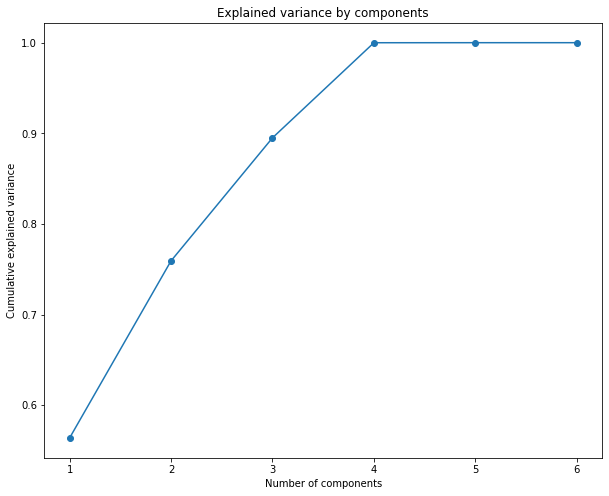

In [10]:
# create graph to view cumulative variance

plt.figure(figsize = (10, 8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [11]:
# choose 3 components (based on keeping ~80% of variance shown in above plot)

pca = PCA(n_components = 3)

In [12]:
# fit the model to the selected 3 components

pca.fit(segmentation_std)

PCA(n_components=3)

In [13]:
pca.transform(segmentation_std)

array([[-0.55372829, -0.34498432, -0.88563805],
       [-0.55401154, -0.33662319, -0.87753233],
       [-0.55435144, -0.32658984, -0.86780547],
       ...,
       [-0.57963737,  0.4603679 , -0.92388254],
       [-0.58033605,  0.48099201, -0.90388844],
       [-0.58145017,  0.5138791 , -0.87200594]])

In [14]:
final = pca.transform(segmentation_std)

In [15]:
final.shape

(4644, 3)

## The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(final).score(final) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-24937.822143019956,
 -11980.602518122416,
 -8656.507301314865,
 -6610.715163007075,
 -5132.268284279248,
 -4045.5216207436115,
 -3343.0431679493586,
 -2702.9031283922463,
 -2344.2308643325423]

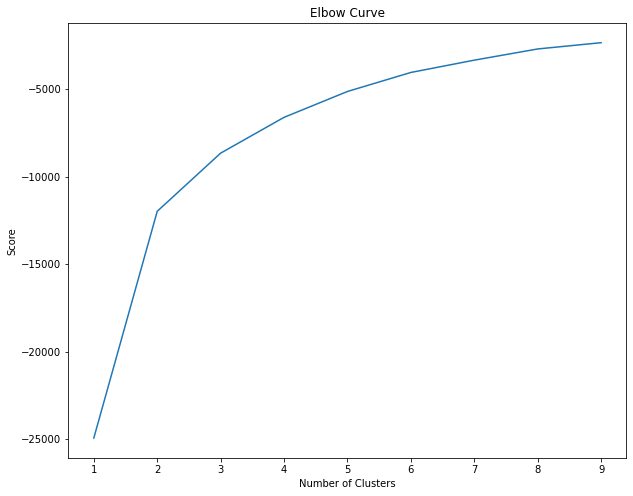

In [18]:
# Plot the elbow curve using PyLab.

plt.figure(figsize = (10, 8))
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I'll be using 3 clusters based on this plot. There is a big jump from 1 to 2, but it's from 3 clusters that the line starts leveling/smoothing out

## k-means clustering

In [19]:
# create the k-means object

kmeans = KMeans(n_clusters = 3)

In [20]:
# fit the k-means object to the data

kmeans.fit(final)

KMeans(n_clusters=3)

In [21]:
# create a 'Clusters' column in the df with the results of the k-means clusters

df['Clusters'] = kmeans.fit_predict(final)

In [22]:
df.head()

,Region Code,Region,Country Code,Country,Year,Sex,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$),Clusters
0,AMR,Americas,BRB,Barbados,2019,Female,0.16,148208,138813,287021,10.10,5.209000e+09,0
1,AMR,Americas,BRB,Barbados,2019,Both sexes,0.31,148208,138813,287021,10.10,5.209000e+09,0
2,AMR,Americas,BRB,Barbados,2019,Male,0.49,148208,138813,287021,10.10,5.209000e+09,0
3,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Female,0.67,54496,56097,110593,18.62,8.250407e+08,2
4,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Both sexes,1.01,54496,56097,110593,18.62,8.250407e+08,2


In [23]:
df['Clusters'].value_counts()

0    3733
2     857
1      54
Name: Clusters, dtype: int64

Text(0, 0.5, 'Suicide Rates per 100,000')

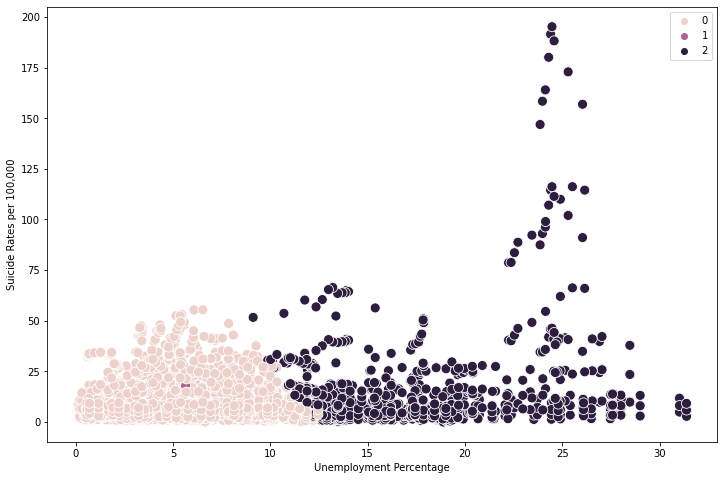

In [24]:
# plot the clusters for the 'Suicide Rates per 100,000' and 'Unemployment Percentage' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df['Unemployment Percentage'], y = df['Suicide Rates per 100,000'], hue = kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Unemployment Percentage')
plt.ylabel('Suicide Rates per 100,000')

This plot makes some sense in that cluster 2 is in the lower end of the unemployment % and has lower suicide rates, whereas cluster 0 accounts for data points from 13% onwards and has higher suicide rates. I cannot see the data points for cluster 1 to make a comment on them

Text(0, 0.5, 'Suicide Rates per 100,000')

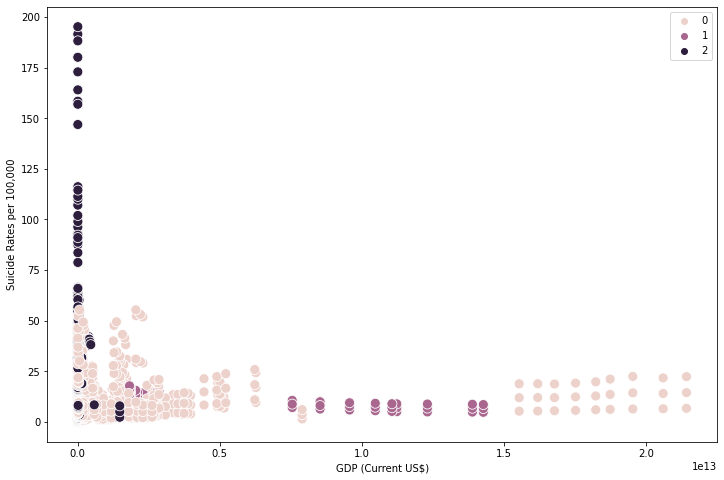

In [25]:
# plot the clusters for the 'Suicide Rates per 100,000' and 'GDP (Current US$)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df['GDP (Current US$)'], y = df['Suicide Rates per 100,000'], hue = kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('GDP (Current US$)')
plt.ylabel('Suicide Rates per 100,000')

Cluster 0 is for data points with the highest suicide rates and lowest GDP, and cluster 1 collectively have the lowest suicide rates and seem to have mid GDP's. Cluster 2 is a little confusing as it is on either end of the scatterplot with cluster 1 being in the middle of it. The suicide rates are lower than cluster 0, but higher than cluster 1, which is the main difference between the clusters

In [26]:
df.loc[df['Clusters'] == 2, 'cluster'] = 'Dark purple'
df.loc[df['Clusters'] == 1, 'cluster'] = 'Purple'
df.loc[df['Clusters'] == 0, 'cluster'] = 'Pink'

In [27]:
df.groupby('cluster').agg({'Unemployment Percentage':['mean', 'median'], 
                         'GDP (Current US$)':['mean', 'median'], 
                          'Suicide Rates per 100,000':['mean', 'median']})

Unemployment Percentage         GDP (Current US$)                \
                               mean  median              mean        median   
cluster                                                                       
Dark purple               17.553921  17.250      9.688258e+10  1.565466e+10   
Pink                       5.356724   4.920      4.498503e+11  5.195374e+10   
Purple                     5.020000   4.935      6.615435e+12  5.211002e+12   

            Suicide Rates per 100,000         
                                 mean median  
cluster                                       
Dark purple                 15.492987   7.88  
Pink                        10.082935   7.64  
Purple                      10.503333  10.70

_using median to compare as it's not a normal distribution, so mean isn't the best measure of central tendency_

- The Dark purple cluster has the worst stats overall, with the middle median suicide rates, the lowest GDP median, and the highest unemployment median
- The Pink purple cluster has has the lowest median unemployment %, second best GDP median, and the lowest suicide rates median. Though the 'outliers' on the right hand side of the plot could greatly affect the median and mean for all stats.
- Comparing the 2 could indicate that lower unemployment rates and higher GDP (richer/developed countries) have lower suicide rates, although the relationships are not linear, and 'outliers' may affect this assumption
- The Purple cluster has the mid median in unemployment %, but only by 0.025 difference off the lowest. It also has median GDP, but the worst median suicide rates. 

It is very difficult to make assumptions based on these. The Purple cluster is the only one not affected by 'outliers' or large variance in the data points. I believe the variance in data points for the Pink and Dark purple clusters are skewing the median and mean stats (perhaps 5 clusters may be more appropriate). Example: in both scatterplots, it is obvious the the Pink cluster has the highest number of suicide rates, however, the stats in the table tell a different story, with it having a median suicide rate that's only 0.26 off the lowest

## Proposed future steps

- It is very difficult to gauge relationships based on bivariate analysis. A mulivariate analysis could uncover more useful &
accurate insights.
- More variables should be sourced and analysed to determine if there is a variable that does influence suicide rates, either 
positively or negatively
- Dig deeper into the data to find out if population composition (males/females) affects suicide rates
- Create subsets of the countries with highest and lowest suicide rates, and perform the above analyses on them. This may
eliminate the variance in the data points that is skewing the results

# Export dataframe

In [28]:
# exporting dataframe as 'suicide_clusters.csv'

df.to_csv(os.path.join(path, 'Prepared Data', 'suicide_clusters.csv'), index = False)